<a target="_blank" href="https://colab.research.google.com/github/DeKUT-DSAIL/ieee-africon-2023/blob/main/water-resource-monitoring/anomaly_detection/Data_from_Kenet.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

##### To get data from the InfluxDB database from a KENET a server, we need to query the database in Python using the InfluxDB client 

In [8]:
#import the necesary packages
import pandas as pd
from matplotlib import pyplot as plt
from influxdb import InfluxDBClient
from datetime import datetime, timedelta
import numpy as np

- Visualize the data

In [9]:
#use the KENET Machine IP address and the database name to access the data.
client = InfluxDBClient(host = '197.137.66.32', port = 8086, database = 'kenet1')
query_str="select * from \"kenet1\" where \"device_id\" = \'ngatosolar1\'" # influxdb query style
result = client.query(query_str)
result_list = list(result.get_points())
df = pd.DataFrame(result_list) # dataframe with the data.
df[['time']] = df[['time']].apply(pd.to_datetime)

In [10]:
# Conditioning the data (timezone)
df2 = df.set_index('time')
df3 = df2.tz_convert('Africa/Nairobi')
df4 = df3.reset_index()
df5= df4.drop(['channel_rssi','dev_eui','frequency','dev_addr','received_at','rssi', 'sensor', 'ts', 'snr','solar_voltageA','solar_voltageB','solar_current'], axis = 1)
df5

,time,battery_voltage,device_id,gateway_id,height
0,2023-08-27 19:57:15.127842528+03:00,4.21,ngatosolar1,multitech-dsail-impala,82
1,2023-08-27 20:02:17.124267061+03:00,4.21,ngatosolar1,multitech-dsail-bushbuck,82
2,2023-08-27 20:07:19.109836548+03:00,4.21,ngatosolar1,multitech-dsail-tower,82
3,2023-08-27 20:12:21.101763731+03:00,4.21,ngatosolar1,multitech-dsail-impala,82
4,2023-08-27 20:17:23.082726419+03:00,4.21,ngatosolar1,multitech-dsail-bushbuck,83
...,...,...,...,...,...
69,2023-08-28 01:44:32.194907473+03:00,4.21,ngatosolar1,multitech-dsail-impala,81
70,2023-08-28 01:49:34.163986786+03:00,4.21,ngatosolar1,multitech-dsail-tower,81
71,2023-08-28 01:54:36.145358662+03:00,4.21,ngatosolar1,multitech-dsail-bushbuck,82
72,2023-08-28 01:59:38.135987221+03:00,4.21,ngatosolar1,multitech-dsail-impala,82


In [11]:
df5[['time']] = df5[['time']].apply(pd.to_datetime, dayfirst=True)
date = '08-28-2023'
df6 = df5.set_index('time')
df7 = df6[date].reset_index()


C:\Users\PC\AppData\Local\Temp/ipykernel_3564/868541398.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df7 = df6[date].reset_index()


- Plot the battery_voltage

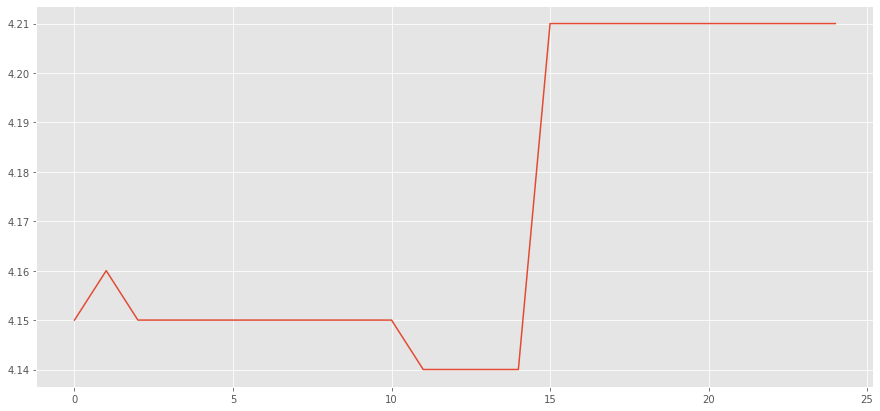

In [12]:
plt.plot(df7['battery_voltage'])
plt.show()